# QWZ Model: easy calculations using Kwant

In [1]:
## First some standar imports
import numpy as np
import matplotlib
import kwant
import kwant.continuum
from matplotlib import pyplot as plt
from ipywidgets import *
import tinyarray
%matplotlib inline
plt.rcParams.update({'font.size': 12})
from matplotlib import cm

In [2]:
# Let's define the Pauli matrices
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

##### - Let's start by defining the system


In order to show another way to build systems in kwant, will use kwant.continuum wich allows to introduce a continuum Hamiltonian and obtain a discretized version directly.

We will use the continuum Hamiltonian that corresponds to the tight-binding description given in class. More precisely it has the following form:

\begin{equation}
    H =k_x \sigma_x + k_y \sigma_y+ \left(u + \frac{4 - k_x^2-k_y^2}{2}\right)\sigma_z.
\end{equation}

In [3]:
# 2 band model exhibiting quantum anomalous Hall effect, in this example we use kwant.continuum in order to discretize the model
def make_model(a):
    ham = ("(k_x * sigma_x + k_y * sigma_y)"
           "+ (u + (4. -kk)/2.) * sigma_z")
    subs = {"kk": "k_x**2 + k_y**2"}
    return kwant.continuum.discretize(ham, locals=subs, grid=a)

def QWZ_ribbon(L):
    model = make_model(a = 1);
    def lead_shape(site):
        x, y = site.pos / L
        return abs(y) < 0.5
    def central_shape(site):
        x, y = site.pos / L
        return abs(x) < 3/5 and abs(y) < 0.5
    lead = kwant.Builder(kwant.TranslationalSymmetry(model.lattice.vec((-1, 0))))
    lead.fill(model, lead_shape, (0, 0))

    syst = kwant.Builder()
    syst.fill(model, central_shape, (0, 0))
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst.finalized()

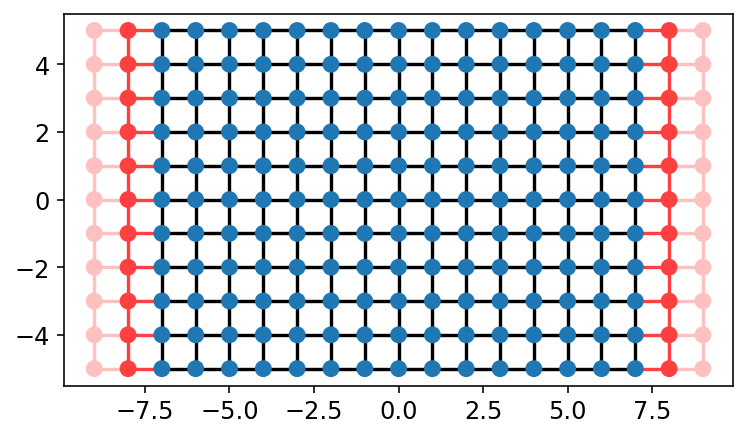

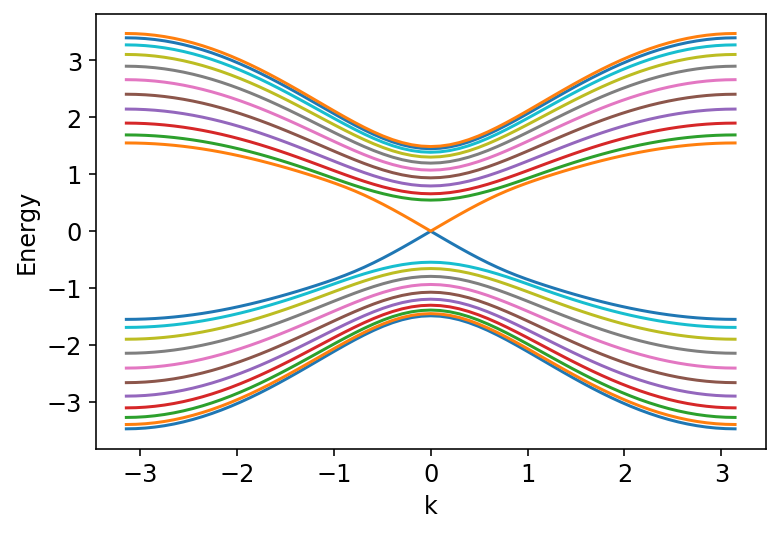

In [4]:
# Set up our system, and define the model parameters.
params = dict(u=-1.5); L = 12; 
syst = QWZ_ribbon(L = 12)
kwant.plot(syst)
kwant.plotter.bands(syst.leads[0], params = params);

#### - Compute the current at a given energy 

In [5]:
def plot_current(en):
    # Calculate the scattering states at energy 'en' coming from the left (numbered as 0) lead, and the associated particle current.
    psi = kwant.wave_function(syst, energy=en, params=params)(0)
    J = kwant.operator.Current(syst).bind(params=params)
    current = sum(J(p) for p in psi)

    # The bands:
    fig = plt.figure(figsize=(16, 5))
    ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133);
    kwant.plotter.bands(syst.leads[0], params = params, ax = ax1);
    ax1.axhline(y = en, color= 'k', ls = '--')

    ax2.set_title('Current from the left lead')
    kwant.plotter.current(syst, current, ax = ax2, cmap = 'Blues');

    # Calculate the scattering states at energy en coming from the right(1) lead
    psi = kwant.wave_function(syst, energy=en, params=params)(1)
    J = kwant.operator.Current(syst).bind(params=params)
    current = sum(J(p) for p in psi)
    ax3.set_title('Current from the right lead')
    kwant.plotter.current(syst, current, ax = ax3, cmap = 'Blues');

    ax1.set_xlabel('k'); ax1.set_ylabel('Energy')
    for ax in [ax2, ax3]:
        ax.set_xlabel('x'); ax.set_ylabel('y');
    plt.show();

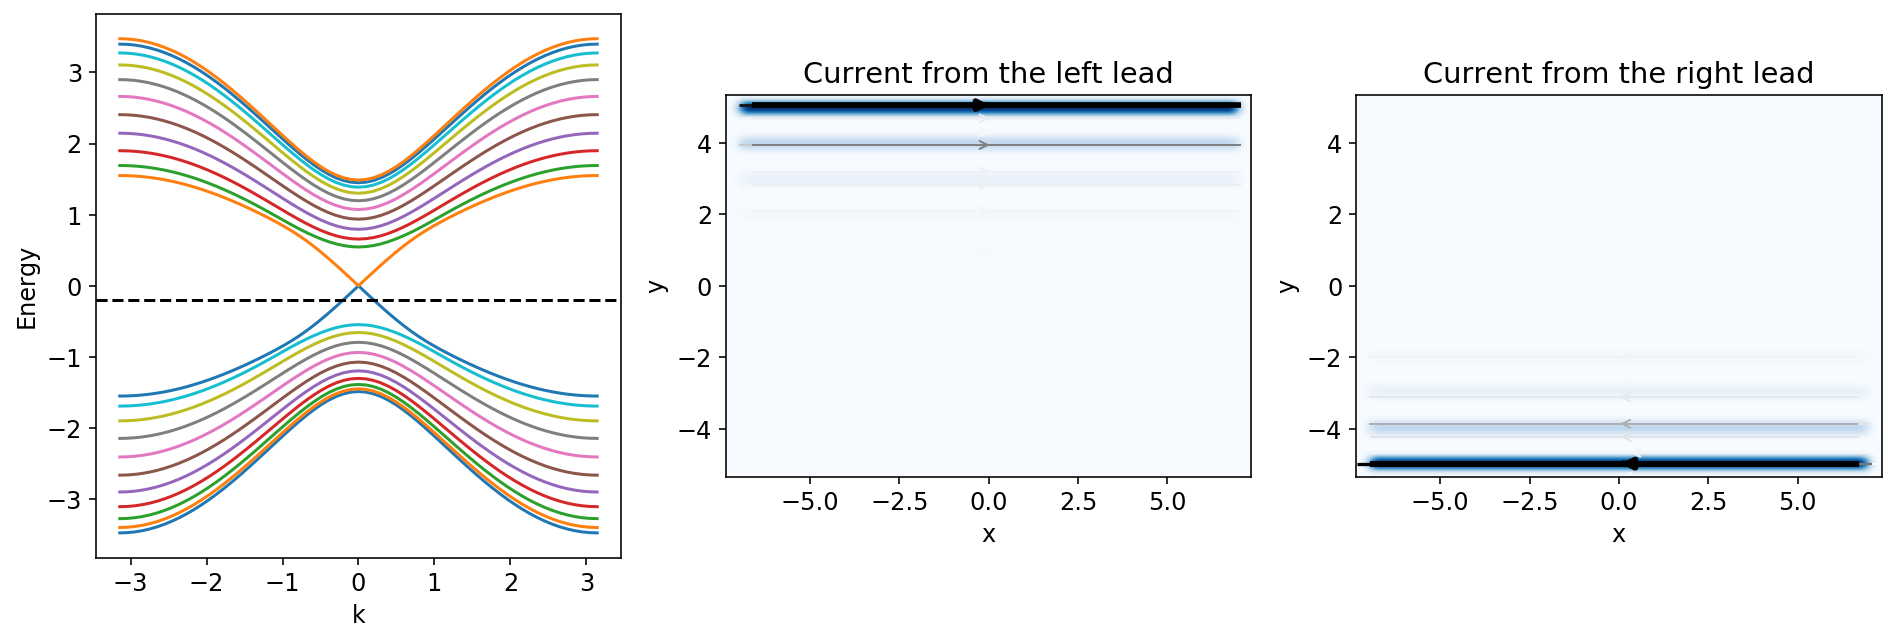

In [6]:
en = -0.2
plot_current(en)

In [7]:
interact(plot_current, en=widgets.FloatSlider(min=-2.01, max=2., step=0.25, value=-0.5));

interactive(children=(FloatSlider(value=-0.5, description='en', max=2.0, min=-2.01, step=0.25), Output()), _do…

Finally let's see what happens if we are in the other topological phase (Q = +1)

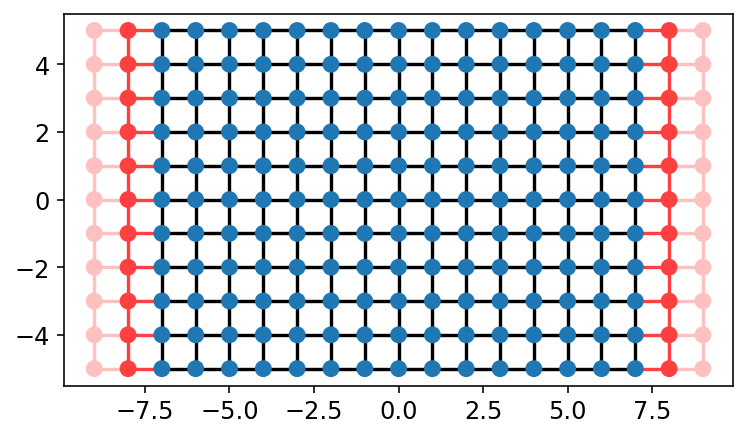

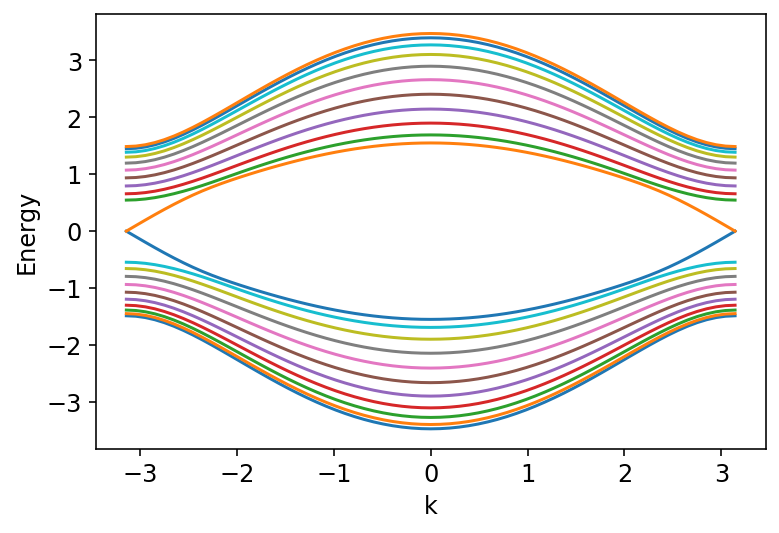

In [8]:
params = dict(u=1.5); L = 12; 
syst = QWZ_ribbon(L = 12)
kwant.plot(syst)
kwant.plotter.bands(syst.leads[0], params = params);

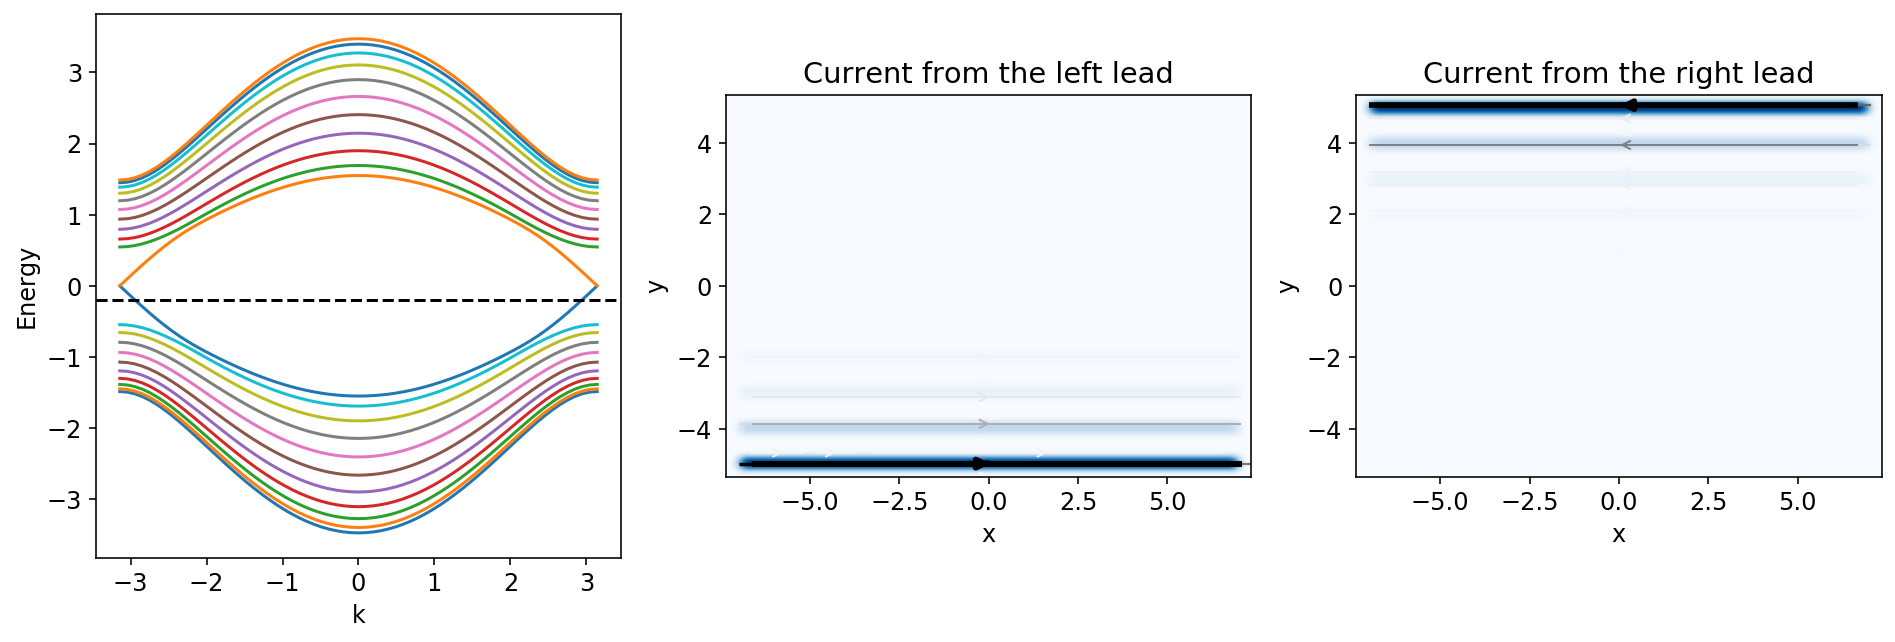

In [9]:
en = -0.2
plot_current(en)